In [1]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [9]:
def show_image(image, cmap_type= 'gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.axis('off')
    plt.show()

In [22]:
#visualising first ten products

sample= train_X[:10]

In [24]:
from skimage import color

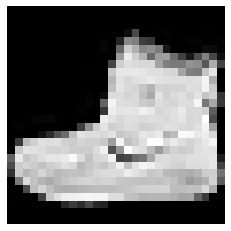

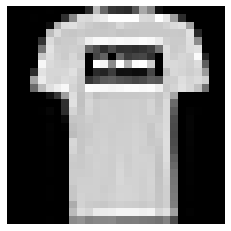

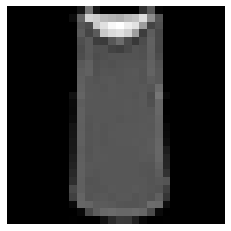

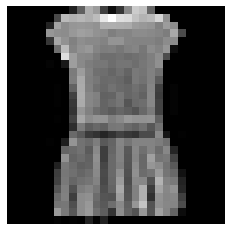

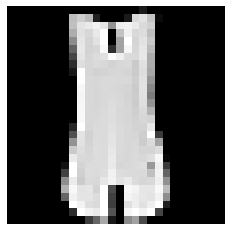

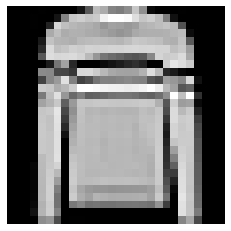

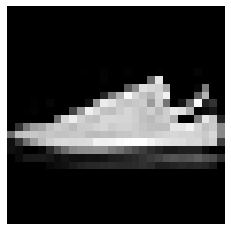

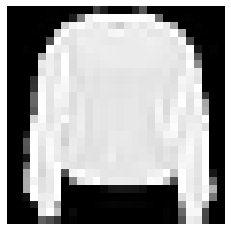

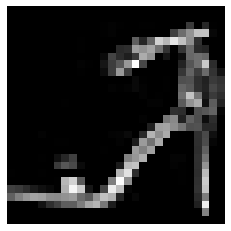

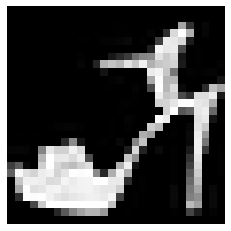

In [25]:
for i in sample:
    show_image(color.gray2rgb(i))

In [12]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [13]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [39]:
# Change the labels from categorical to one-hot encoding

train_Y_one_hot = pd.get_dummies(train_Y).values
test_Y_one_hot = pd.get_dummies(test_Y).values

In [40]:
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0 0 0 0 0 0 0 0 0 1]


In [45]:
import warnings

warnings.filterwarnings("ignore")

### Modelling

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D, Dropout
from keras.layers import normalization
from keras.layers.advanced_activations import LeakyReLU

In [50]:
fashionmodel= Sequential()


In [51]:
fashionmodel.add(Conv2D(32, kernel_size=3,activation='relu',input_shape=(28,28,1),padding='same'))

In [52]:
fashionmodel.add(MaxPooling2D(2,padding='same'))

In [53]:
fashionmodel.add(Conv2D(64, kernel_size= 3 , activation='relu',padding='same'))

In [54]:
fashionmodel.add(MaxPooling2D(2,padding='same'))

In [55]:
fashionmodel.add(Conv2D(128, kernel_size= 3 , activation='relu',padding='same'))

In [56]:
fashionmodel.add(MaxPooling2D(2,padding='same'))

In [57]:
fashionmodel.add(Flatten())

In [58]:
fashionmodel.add(Dense(128, activation='relu'))

In [59]:
fashionmodel.add(Dense(10, activation='softmax'))

### Compiling the Model

In [61]:
fashionmodel.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [62]:
fashionmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 128)       

In [67]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [68]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

### Training the Model

In [69]:
fashion_train = fashionmodel.fit(train_X, train_Y_one_hot, batch_size=64 ,epochs=20,verbose=1,validation_split = 0.2)

Epoch 1/20
750/750 [==============================] - 69s 92ms/step - loss: 0.5158 - accuracy: 0.8071 - val_loss: 5.4940 - val_accuracy: 0.7792
Epoch 2/20
750/750 [==============================] - 68s 91ms/step - loss: 0.3134 - accuracy: 0.8832 - val_loss: 14.6666 - val_accuracy: 0.7105
Epoch 3/20
750/750 [==============================] - 115s 154ms/step - loss: 0.2699 - accuracy: 0.9013 - val_loss: 20.3954 - val_accuracy: 0.7158
Epoch 4/20
750/750 [==============================] - 85s 113ms/step - loss: 0.2379 - accuracy: 0.9120 - val_loss: 26.3413 - val_accuracy: 0.7063
Epoch 5/20
750/750 [==============================] - 81s 108ms/step - loss: 0.2175 - accuracy: 0.9184 - val_loss: 31.7945 - val_accuracy: 0.6808
Epoch 6/20
750/750 [==============================] - 70s 94ms/step - loss: 0.1965 - accuracy: 0.9275 - val_loss: 48.8482 - val_accuracy: 0.6655
Epoch 7/20
750/750 [==============================] - 69s 92ms/step - loss: 0.1802 - accuracy: 0.9343 - val_loss: 32.8683 - val

### Evaluation

In [73]:
test_eval = fashionmodel.evaluate(test_X, test_Y_one_hot, verbose=0)

In [74]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.38672661781311035
Test accuracy: 0.913100004196167


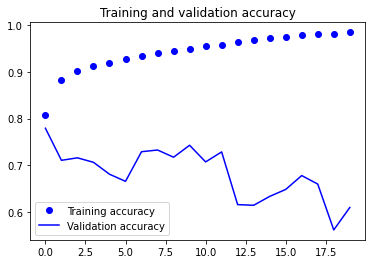

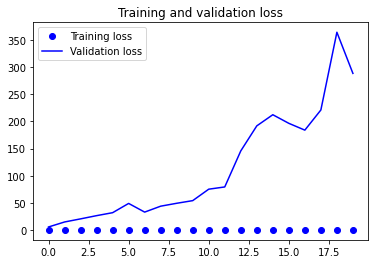

In [71]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

From the plots, it is evident that the validation accuracy stopped improving after a few epochs and only saw occasional slight increases. At the start, the validation accuracy was steadily increasing along with the loss, but it stopped showing much improvement later on. The increase in validation loss after a few epochs indicates overfitting, as the model began to memorize the data instead of generalizing it.

### Adding Regularisation Method to avoid Overfitting

In [75]:
fashionmodel = Sequential()
fashionmodel.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(28,28,1)))
fashionmodel.add(MaxPooling2D((2, 2),padding='same'))
fashionmodel.add(Dropout(0.25))
fashionmodel.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
fashionmodel.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashionmodel.add(Dropout(0.25))
fashionmodel.add(Conv2D(128, (3, 3), activation='relu',padding='same'))                 
fashionmodel.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashionmodel.add(Dropout(0.4))
fashionmodel.add(Flatten())
fashionmodel.add(Dense(128, activation='relu'))          
fashionmodel.add(Dropout(0.3))
fashionmodel.add(Dense(10, activation='softmax'))

In [76]:
fashionmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)         

In [77]:
fashionmodel.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [78]:
fashion_train_dropout = fashionmodel.fit(train_X, train_Y_one_hot, batch_size=64 ,epochs=20,verbose=1,validation_split = 0.2)

Epoch 1/20
750/750 [==============================] - 76s 99ms/step - loss: 0.6474 - accuracy: 0.7569 - val_loss: 0.4146 - val_accuracy: 0.8465
Epoch 2/20
750/750 [==============================] - 69s 92ms/step - loss: 0.4062 - accuracy: 0.8523 - val_loss: 0.3107 - val_accuracy: 0.8827
Epoch 3/20
750/750 [==============================] - 67s 90ms/step - loss: 0.3526 - accuracy: 0.8720 - val_loss: 0.2870 - val_accuracy: 0.8963
Epoch 4/20
750/750 [==============================] - 66s 88ms/step - loss: 0.3215 - accuracy: 0.8809 - val_loss: 0.2769 - val_accuracy: 0.8975
Epoch 5/20
750/750 [==============================] - 67s 89ms/step - loss: 0.3014 - accuracy: 0.8887 - val_loss: 0.2535 - val_accuracy: 0.9061
Epoch 6/20
750/750 [==============================] - 66s 88ms/step - loss: 0.2878 - accuracy: 0.8935 - val_loss: 0.2453 - val_accuracy: 0.9101
Epoch 7/20
750/750 [==============================] - 66s 88ms/step - loss: 0.2735 - accuracy: 0.8984 - val_loss: 0.2472 - val_accuracy:

### Evaluation

In [80]:
test_eval = fashionmodel.evaluate(test_X, test_Y_one_hot, verbose=0)

In [81]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22133119404315948
Test accuracy: 0.9225000143051147


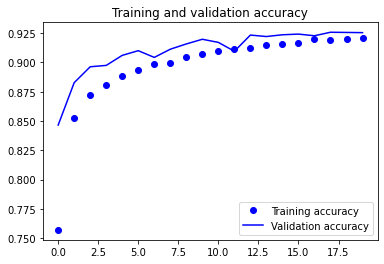

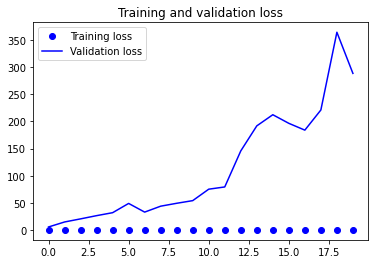

In [79]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Prediction

In [105]:
predictions=  fashionmodel.predict(test_X)

In [113]:
predictions = np.argmax(np.round(predictions),axis=1)

Found 9171 correct labels


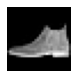

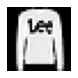

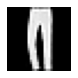

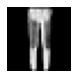

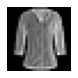

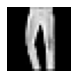

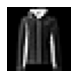

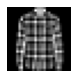

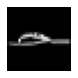

In [121]:
correct = np.where(predictions==test_Y)[0] # this returns the indices
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    show_image(test_X[correct].reshape(28,28))